In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

Import file and remove irrelevant columns

In [65]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.dropna()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Data preprocessing

In [66]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['v2']) # Establish ML centralized data
y = df['v1']

In [67]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # There are two unique classes, this should reduce y to 1s and 0s

Train Test Split Data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

Train and Use Multinominal Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [70]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [71]:
y_pred = clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_report = classification_report(y_test, y_pred)
test_matrix = confusion_matrix(y_test, y_pred)

print("Classification Accuracy for Naive Bayes:")
print(test_accuracy)
print("Classification Report for Naive Bayes:")
print(test_report)
print("Confusion Matrix for Naive Bayes:")
print(test_matrix)

Classification Accuracy for Naive Bayes:
0.9838516746411483
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.93      0.95      0.94       219

    accuracy                           0.98      1672
   macro avg       0.96      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Confusion Matrix for Naive Bayes:
[[1437   16]
 [  11  208]]


Logical Regression Testing for verification

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
log_reg = LogisticRegression(max_iter=1000)  
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [74]:
y_pred_lr = log_reg.predict(X_test)

test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
test_report_lr = classification_report(y_test, y_pred_lr)
test_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Classification Accuracy for Logical Regression:")
print(test_accuracy_lr)
print("Classification Report for Logical Regression:")
print(test_report_lr)
print("Confusion Matrix for Logical Regression:")
print(test_matrix_lr)

Classification Accuracy for Logical Regression:
0.9838516746411483
Classification Report for Logical Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.99      0.88      0.93       219

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Confusion Matrix for Logical Regression:
[[1452    1]
 [  26  193]]


Determine feature importance for further insight

In [77]:
feature_prob = clf.feature_log_prob_
feature_names = vectorizer.get_feature_names_out()
feature_importance = abs(feature_prob[1] - feature_prob[0])
fdf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
f_df = fdf.sort_values(by='Importance', ascending=False)

Plot importance

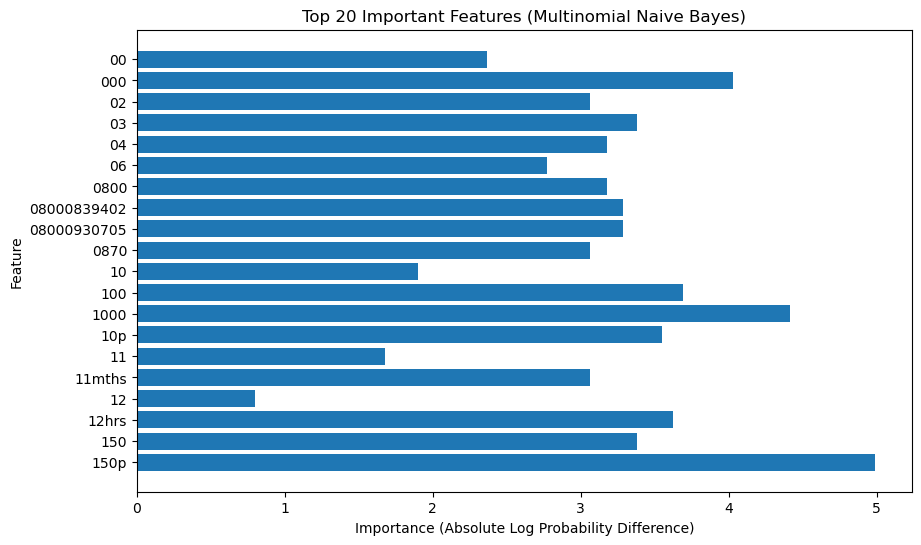

In [80]:
import matplotlib.pyplot as plt
n = 20 # This variable represents how many of the top values to plot
plt.figure(figsize=(10, 6))
plt.barh(fdf['Feature'][:n], fdf['Importance'][:n])
plt.xlabel('Importance (Absolute Log Probability Difference)')
plt.ylabel('Feature')
plt.title('Top 20 Important Features (Multinomial Naive Bayes)')
plt.gca().invert_yaxis()
plt.show()

As we see from these insights, the biggest tell on spam emails appear to be numbers, the most egregious being 150p.  Reviewing the data base, this appears to be from a series of emails containing offers for 150 pounds.

My biggest takeaway from these numbers is that our dataset is not big enough, one series of text messages appears to be skewing our model, while this is good for accuracy scores, if this model was to be usedin real time or tested against another dataset, it would most likely produce worse results.

In [81]:
from sklearn.decomposition import LatentDirichletAllocation

In this section I am going to use Latent Dirichlet Allocation to uncover relevant topics in the data.

In [84]:
lda = LatentDirichletAllocation(n_components=10, random_state=23)
X_train_topics = lda.fit_transform(X_train)

In [85]:
clf_topics = MultinomialNB()
clf_topics.fit(X_train_topics, y_train)

MultinomialNB()

In [86]:
X_test_topics = lda.transform(X_test)
y_pred_topics = clf_topics.predict(X_test_topics)

In [90]:
top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx), end=" ")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]))

Topic 0: know ll don going ask ve way yeah tell thanks
Topic 1: ok come time think msg tomorrow ur free mobile god
Topic 2: lor da ì_ ok wat hi oh dun wan leave
Topic 3: got ur right soon use like getting special ok help
Topic 4: good home night ur day babe pls im need dear
Topic 5: txt free ur send claim text www prize stop mobile
Topic 6: gt lt sorry love later ll miss good day just
Topic 7: like yo holiday doing account stuff buy long wat details
Topic 8: just free want reply stop text dont live min know
Topic 9: happy great day lol new know dont did yes wish
